# Oversampling with smote

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
from collections import Counter

In [3]:
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader


In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Load and pre-process the data

In [6]:
train_path = '../data/train/combined.pkl'

In [7]:
with open(train_path, 'rb') as f:
    training_data = pkl.load(f)

In [8]:
classes2name = {11: 'electron', 13: 'muon', 211: 'pion', 321: 'kaon', 2212: 'proton'}
classes2int = {211:0, 321:1, 2212:2, 11:3, 13:4}

In [9]:
def show_images(data):
    fig = plt.figure(figsize=(25, 4))
    
    for i in np.arange(20):
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
        ax.imshow(data[0][i], cmap='gray')
        ax.set_title(classes2name[data[1][i]])

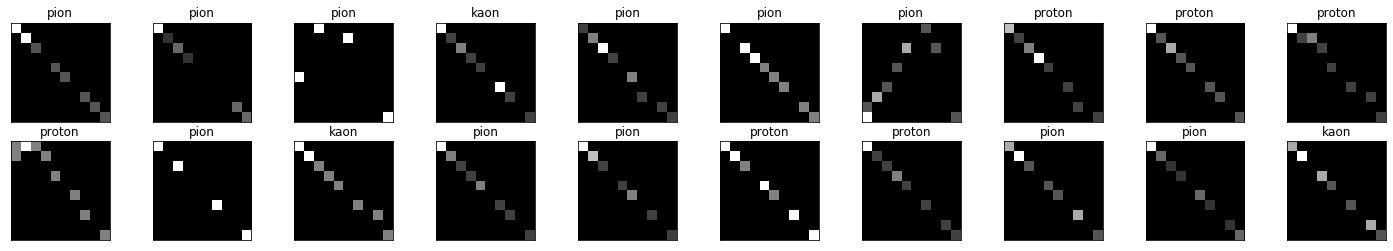

In [10]:
show_images(training_data)

## Distribution of data

In [11]:
counts = Counter(training_data[1])
counts

Counter({211: 906047, 321: 154323, 2212: 111730, 13: 1237, 11: 3138})

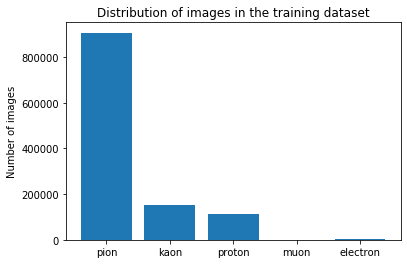

In [12]:
labels = [classes2name[i] for i in list(counts.keys())]

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), labels)
plt.ylabel('Number of images')
plt.title('Distribution of images in the training dataset')
plt.show()

## Apply SMOTE

In [13]:
images = [i for i in training_data[0]]
labels = [i for i in training_data[1]]

In [14]:
images = np.array(images)
labels = np.array(labels)

In [15]:
images.shape, labels.shape

((1176475, 10, 10), (1176475,))

In [19]:
flattened_images = np.reshape(images, (1176475, 100))

In [21]:
sm = SMOTE(random_state=2)

In [22]:
x_smote, y_smote = sm.fit_sample(flattened_images, labels)

In [23]:
x_smote.shape

(4530235, 100)

In [27]:
path = '../data/train/'

In [28]:
with open(os.path.join(path, 'oversampled_images.pkl'), 'wb') as f:
    pkl.dump(x_smote, f)

In [29]:
with open(os.path.join(path, 'oversampled_labels.pkl'), 'wb') as f:
    pkl.dump(y_smote, f)

In [30]:
smote_counts = Counter(y_smote)
smote_counts

Counter({211: 906047, 321: 906047, 2212: 906047, 13: 906047, 11: 906047})

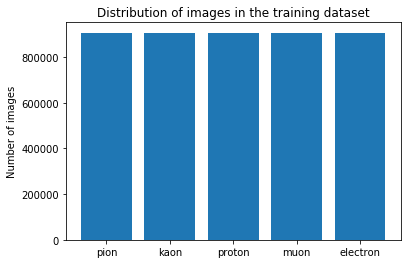

In [31]:
labels = [classes2name[i] for i in list(smote_counts.keys())]

plt.bar(range(len(smote_counts)), list(smote_counts.values()), align='center')
plt.xticks(range(len(smote_counts)), labels)
plt.ylabel('Number of images')
plt.title('Distribution of images in the training dataset')
plt.show()